# Running Bsort in Google Colab

This notebook demonstrates how to run the Bottle Cap Detection system in Google Colab.

## Setup
You have two options:
1. **Clone from GitHub**: If you have pushed the code to a public/private repo.
2. **Upload Files**: Zip your local project and upload it to Colab.

In [18]:
# Option 1: Clone from GitHub (Replace with your URL)
# !git clone https://github.com/yourusername/bottle-cap-detection.git
# %cd bottle-cap-detection

# Option 2: If you uploaded a zip file
# !unzip bottle-cap-detection.zip
# %cd bottle-cap-detection

## 1. Install Dependencies
We install the package in editable mode so we can modify code if needed.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Setup Project
import os

# Change this to where you uploaded your project
project_path = '/content/drive/MyDrive/bottle-cap-detection'

if not os.path.exists(project_path):
    print(f"Project not found at {project_path}. Please check the path.")
else:
    %cd {project_path}
    print("Current working directory:", os.getcwd())

    # Install the package in editable mode
    !pip install -e .[dev]

/content/drive/MyDrive/bottle-cap-detection
Current working directory: /content/drive/MyDrive/bottle-cap-detection
Obtaining file:///content/drive/MyDrive/bottle-cap-detection
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for bsort (pyproject.toml) ... done
  Created wheel for bsort: filename=bsort-0.1.0-0.editable-py3-none-any.whl size=4372 sha256=5a20e072c904f7313b4dcfb88292c995a7b97b86aebfedb8241221a8f089a00b
  Stored in directory: /tmp/pip-ephem-wheel-cache-jrhhvcjb/wheels/46/84/59/972e95de95a1ef9a34b4973855c87da6664fe28cb86ebfd9f3
Successfully built bsort
  Attempting uninstall: bsort
    Found existing installation: bsort 0.1.0
    Uninstalling bsort-0.1.0:
      Successfully uninstalled bsort-0.1.0


## 2. Prepare Dataset
This script will split the raw data and generate the YOLO formatted dataset.

In [21]:
!python -m bsort.data_prep

Processing training set...
Processing validation set...
Dataset preparation complete.


## 3. Train Model
We use the CLI to start training. Make sure to enable GPU in Colab (Runtime > Change runtime type > T4 GPU).

In [22]:
import yaml

with open('config/settings.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

cfg['training']['device'] = 0  # Use GPU
cfg['training']['epochs'] = 100 # Adjust epochs as needed

with open('config/settings.yaml', 'w') as f:
    yaml.dump(cfg, f)

!bsort train --config config/settings.yaml

wandb: Currently logged in as: aldnalexandr (aldnalexandr-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: ⢿ Waiting for wandb.init()...
wandb: ⣻ Waiting for wandb.init()...
wandb: ⣽ setting up run 0qcueixy (0.3s)
wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in /content/drive/MyDrive/bottle-cap-detection/wandb/run-20251129_101004-0qcueixy
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run solar-wind-1
wandb: ⭐️ View project at https://wandb.ai/aldnalexandr-/bottle-cap-detection
wandb: 🚀 View run at https://wandb.ai/aldnalexandr-/bottle-cap-detection/runs/0qcueixy
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0,

## 4. Inference & Visualization
Run inference on a test image.

Benchmarking...
[ WARN:0@2.562] global loadsave.cpp:275 findDecoder imread_('datasets/test_image.jpg'): can't open/read file: check file path/integrity
Invalid source for benchmark
Viewing results from: runs/detect/val


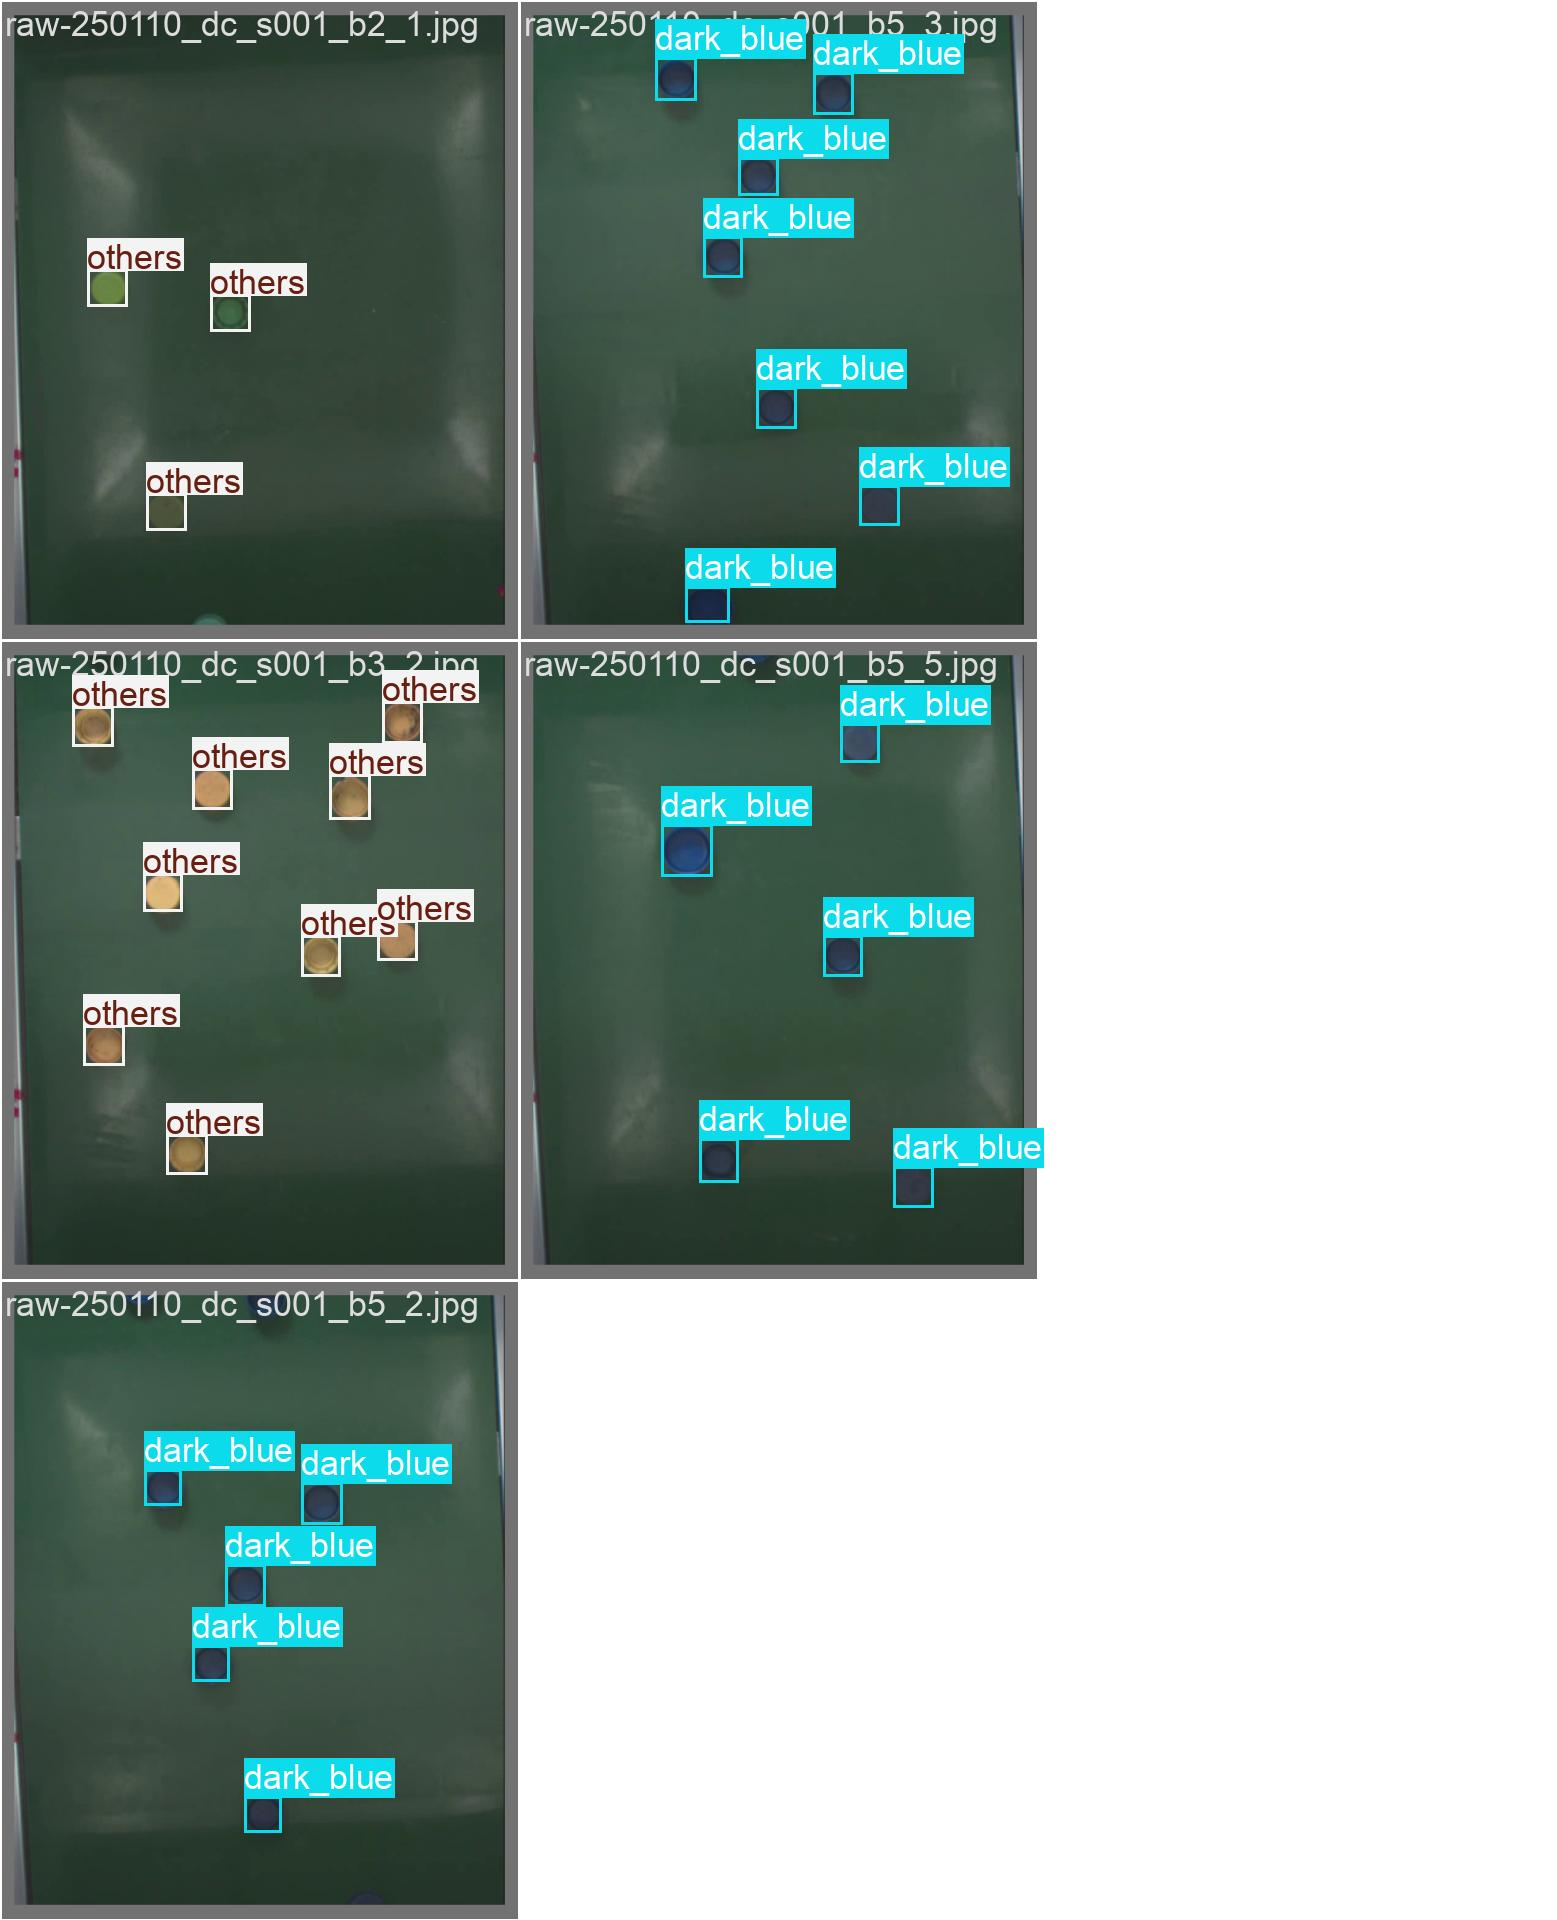

In [23]:
from IPython.display import Image
import glob

# Run inference
!bsort infer --config config/settings.yaml

# Display result (assuming default save location runs/detect/predict)
latest_run = sorted(glob.glob('runs/detect/*'))[-1]
print(f"Viewing results from: {latest_run}")
result_images = glob.glob(f"{latest_run}/*.jpg")
if result_images:
    display(Image(filename=result_images[0]))
else:
    print("No result images found.")